In [62]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
data_time = pd.read_csv("feature_matrix.csv")


In [64]:
data_time['fault'] = pd.Categorical(data_time['fault'])

In [65]:
train, test = train_test_split(data_time, test_size = None, shuffle = True,
                                                    random_state = 324)

In [66]:
train.shape

(5589, 7)

In [67]:
test.shape

(1863, 7)

In [68]:
train.head()

,mean,rms,peak_to_peak,skewness,kurtosis,crest_factor,fault
1763,-0.118459,0.156843,1.313,-0.012711,1.032708,3.315416,normal
4697,-0.113892,0.139754,1.018,-0.017165,2.178904,2.389918,roller
3600,-0.114604,0.160179,1.211,0.058930,0.671178,3.340015,inner
7354,-0.002369,0.155343,1.828,-0.128276,2.616981,5.497523,outer
3290,-0.114203,0.163915,1.958,0.025229,1.163837,5.344221,inner


In [70]:
train['fault'].value_counts()

normal    1646
roller    1616
inner     1602
outer      725
Name: fault, dtype: int64

In [71]:
test['fault'].value_counts()

inner     554
roller    540
normal    510
outer     259
Name: fault, dtype: int64

## Scaling data(standardization)

In [30]:
scaler = StandardScaler()
train_scaled= scaler.fit_transform(train.iloc[:,:-1])
test_scaled = (test.iloc[:,:-1].values - scaler.mean_)/np.sqrt(scaler.var_)

## Training Logistic Regression Model

In [54]:
logistic_clf = LogisticRegression(C = 10, max_iter = 500, n_jobs = -1)

In [55]:
logistic_clf.fit(train_scaled, train['fault'])

LogisticRegression(C=10, max_iter=500, n_jobs=-1)

In [56]:
train_predictions = logistic_clf.predict(train_scaled)
test_predictions = logistic_clf.predict(test_scaled)

## Confusion Matrices

In [57]:
train_confusion_matrix = confusion_matrix(train['fault'], train_predictions)
test_confusion_matrix = confusion_matrix(test['fault'], test_predictions)

## Acuracy Calculation

In [58]:
train_accuracy = accuracy_score(train['fault'], train_predictions)
print("Ovearll training accuracy: ", train_accuracy)

Ovearll training accuracy:  0.7700840937555914


In [59]:
test_accuracy = accuracy_score(test['fault'], test_predictions)
print("Ovearll testing accuracy: ", test_accuracy)

Ovearll testing accuracy:  0.775630703166935


## Heatmap Plot

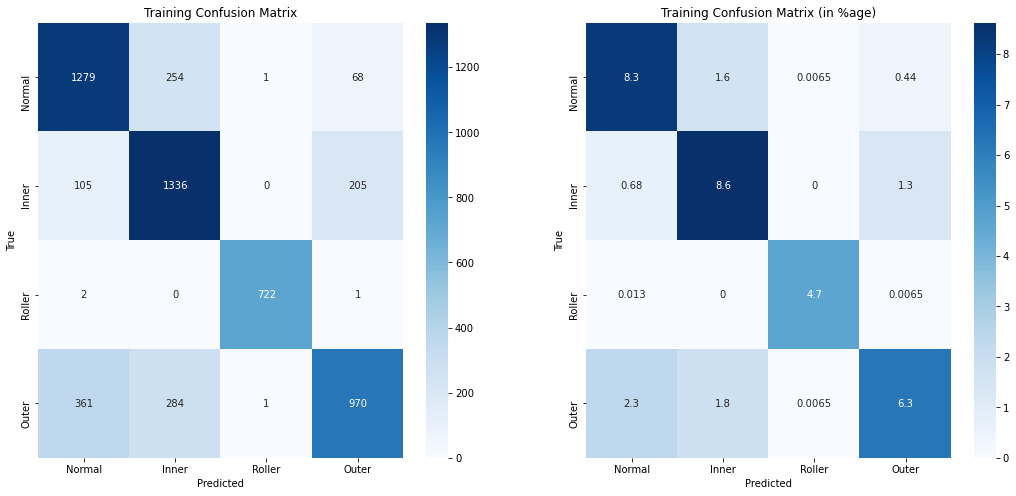

In [46]:
fault_type = ['Normal','Inner','Roller','Outer']
plt.figure(1,figsize=(18,8))
plt.subplot(121)
sns.heatmap(train_confusion_matrix, annot= True,fmt = "d",
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues")
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)

sns.heatmap(train_confusion_matrix/1000, annot= True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues")
plt.title('Training Confusion Matrix (in %age)')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

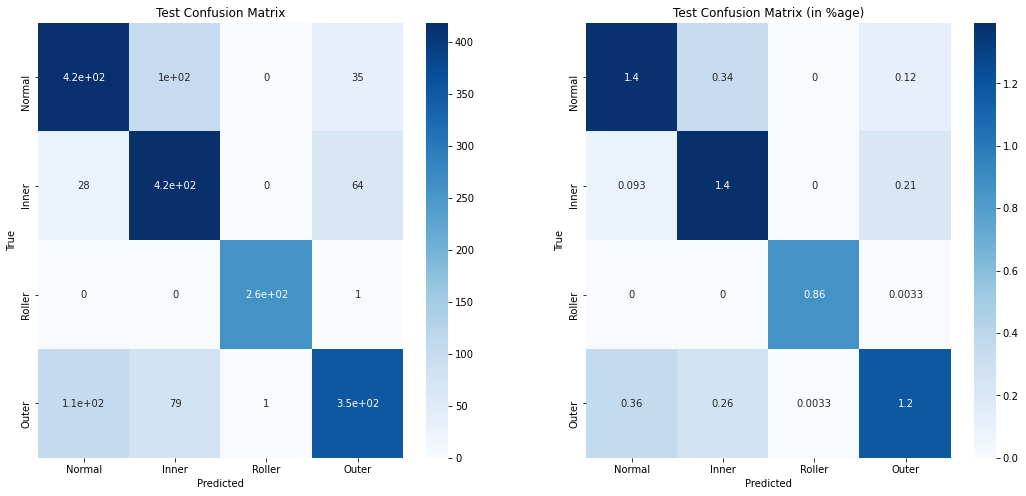

In [72]:
plt.figure(2,figsize=(18,8))
plt.subplot(121)
sns.heatmap(test_confusion_matrix, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues")
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(122)
sns.heatmap(test_confusion_matrix/300, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues")
plt.title('Test Confusion Matrix (in %age)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()